### Dit notebook is gebruikt om de data voor te bereiden. De data is afkomstig uit het Custom Vision portaal, en een deel is extra aangeleverd via Alderli zelf.

#### Onderstaande code maakt het dataframe aan om verder mee te werken.

      Room  Total Files  Laying  Not Laying
0    room1            7       0           7
1    room2           14       0          14
2    room3            8       0           8
3    room4            7       0           7
4    room5            3       0           3
5    room6            8       0           8
6    room7            6       0           6
7    room8           14       0          14
8    room9           11       0          11
9   room10            5       0           5
10  room11            4       0           4
11  room12            2       0           2
12  room13           10       0          10
13  room14            6       0           6
14  room15           20      14           6
15  room16           20       1          19
16  room17           20       0          20
17  room18            5       0           5
18  room19            2       0           2
19  room20            9       0           9
20  room21            6       0           6
21  room22           16      11 

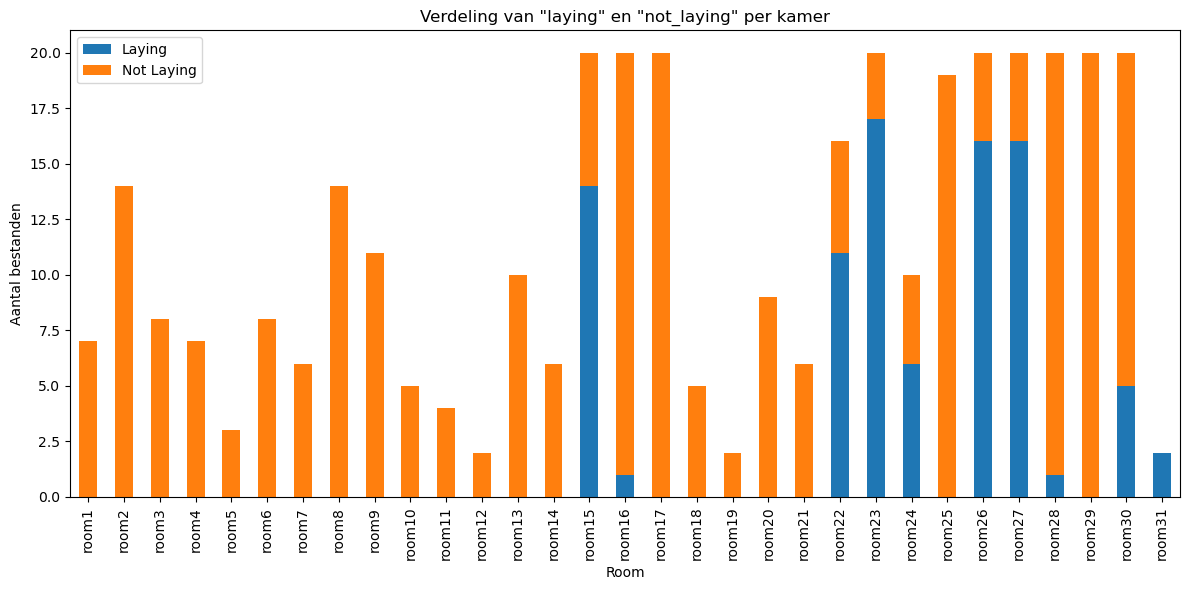

Total not laying: 265
Total laying: 89
Total pictures: 354


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_dir = 'data-filtered-rooms'
data = []
total_not_laying = 0
total_laying = 0

# Doorloop elke kamer
for room in sorted(os.listdir(base_dir)):
    room_path = os.path.join(base_dir, room)
    if os.path.isdir(room_path):
        laying = 0
        not_laying = 0
        total = 0

        for f in os.listdir(room_path):
            file_path = os.path.join(room_path, f)
            if os.path.isfile(file_path):
                total += 1
                fname = f.lower()
                if 'not_laying' in fname:
                    not_laying += 1
                    total_not_laying += 1
                elif 'laying' in fname:
                    laying += 1
                    total_laying +=1

        data.append({
            'Room': room,
            'Total Files': total,
            'Laying': laying,
            'Not Laying': not_laying
        })

df = pd.DataFrame(data)

# Sorteer op kamernummer
df['Room Number'] = df['Room'].str.extract(r'(\d+)').astype(int)
df = df.sort_values('Room Number').drop(columns='Room Number').reset_index(drop=True)

print(df)

df.set_index('Room')[['Laying', 'Not Laying']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel('Aantal bestanden')
plt.title('Verdeling van "laying" en "not_laying" per kamer')
plt.tight_layout()
plt.show()

print(f"Total not laying: {total_not_laying}")
print(f"Total laying: {total_laying}")
print(f"Total pictures: {total_laying+total_not_laying}")

#### Train/val/test split

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Eerst schudden zodat de split willekeurig is
data = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Splitten op kamerniveau
train_rooms, temp_rooms = train_test_split(data, test_size=0.35, random_state=42)
val_rooms, test_rooms = train_test_split(temp_rooms, test_size=0.5, random_state=42)

# Uitschrijven van resultaten
def show_split_info(split_name, df):
    total_files = df['Total Files'].sum()
    print(f"{split_name} set: {len(df)} kamers, totaal {total_files} foto's")
    print(df[['Room', 'Total Files']].sort_values('Room').to_string(index=False))
    print()

show_split_info("Train", train_rooms)
show_split_info("Validation", val_rooms)
show_split_info("Test", test_rooms)

Train set: 20 kamers, totaal 233 foto's
  Room  Total Files
room10            5
room11            4
room12            2
room14            6
room16           20
room17           20
room18            5
room19            2
 room2           14
room22           16
room24           10
room25           19
room26           20
room27           20
room29           20
room30           20
 room4            7
 room5            3
 room7            6
 room8           14

Validation set: 5 kamers, totaal 41 foto's
  Room  Total Files
room13           10
room20            9
room21            6
 room3            8
 room6            8

Test set: 6 kamers, totaal 80 foto's
  Room  Total Files
 room1            7
room15           20
room23           20
room28           20
room31            2
 room9           11



In [ ]:
import os
import shutil

source_root = "data-filtered-rooms"
target_root = "datasets"

def copy_rooms(split_df, split_name):
    dest_dir = os.path.join(target_root, split_name)
    os.makedirs(dest_dir, exist_ok=True)
    
    for room in split_df["Room"]:
        src = os.path.join(source_root, room)
        dst = os.path.join(dest_dir, room)
        if os.path.exists(src):
            shutil.copytree(src, dst, dirs_exist_ok=True)
        else:
            print(f"Waarschuwing: {src} bestaat niet")

copy_rooms(train_rooms, "train")
copy_rooms(val_rooms, "val")
copy_rooms(test_rooms, "test")

print("Kopiëren voltooid.")


Kopiëren voltooid.


### De extra aangeleverde afbeeldingen waren in een veel grotere resolutie dan die uit Custom Vision, dus die worden even groot gemaakt voor een gelijkere verwerking

In [ ]:
import os
from PIL import Image

base_dir = 'c:/Users/milan/Documents/MAAI/Afstuderen/Alderli/data-filtered-rooms/'

# Loop door de room mappen
for room_id in range(1, 32):
    room_path = f"{base_dir}room{room_id}/"
    
    if os.path.exists(room_path):
        for filename in os.listdir(room_path):
            file_path = os.path.join(room_path, filename)
            
            if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    with Image.open(file_path) as img:
                        img_resized = img.resize((640, 480))
                        img_resized.save(file_path)
                        print(f"Afbeelding resized: {file_path}")
                except Exception as e:
                    print(f"Fout bij het verwerken van {file_path}: {e}")
    else:
        print(f"De map {room_path} bestaat niet.")
